In [7]:
import selenium as sl
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import seaborn as sns
import os

In [8]:
driver = webdriver.Firefox(executable_path=os.path.join(os.getcwd(), 'geckodriver'))
driver.maximize_window()
driver.get("https://www.runtouravianca.com/resultados.php")

iframe = driver.find_element_by_css_selector('iframe')
driver.switch_to_frame(iframe)

numero_competencia = []
p_general = []
p_grupo = []
tiempo = []
tiempo_chip = []
categoria = []
genero = []

for i in range(1,10):
    try:
        WebDriverWait(driver, 1).until(EC.alert_is_present(),
                                   'Timed out waiting for PA creation ' +
                                   'confirmation popup to appear.')
        
        alert = driver.switch_to.alert
        alert.dismiss()
    except:
        print('notificacion')
        
    driver.find_element_by_id('numero').clear()
    print (i+1)
    driver.find_element_by_id('numero').send_keys("{}".format(i+1))
    driver.find_element_by_id('buscar').click()
    
    try:
        WebDriverWait(driver, 1).until(EC.alert_is_present(),
                                   'Timed out waiting for PA creation ' +
                                   'confirmation popup to appear.')
        
        alert = driver.switch_to.alert
        alert.dismiss()
        next
    except:
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        tabla = soup.findAll('table')
        datos = tabla[0].findAll('td')

        driver.execute_script("window.history.go(-1)")

        numero_competencia.append(i+1)
        p_general.append(datos[3].text)
        p_grupo.append(datos[5].text)
        tiempo.append(datos[7].text)
        tiempo_chip.append(datos[9].text)
        categoria.append(datos[11].text)
        genero.append(datos[13].text)


/home/shade/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use driver.switch_to.frame instead
  


notificacion
2
notificacion
3
notificacion
4
notificacion
5
notificacion
6
notificacion
7
notificacion
8
notificacion
9
notificacion
10


In [9]:
data = pd.DataFrame(zip(numero_competencia, p_general, p_grupo, tiempo, tiempo_chip, categoria, genero), columns=['Numero_compentencia','Posicion_general','Posicion_grupo','Tiempo_carrera','Tiempo_chip','Categoria','Genero'])

In [10]:
data['Numero_compentencia'].max()

10

In [11]:
data.to_csv('registros_1_to_10.csv')

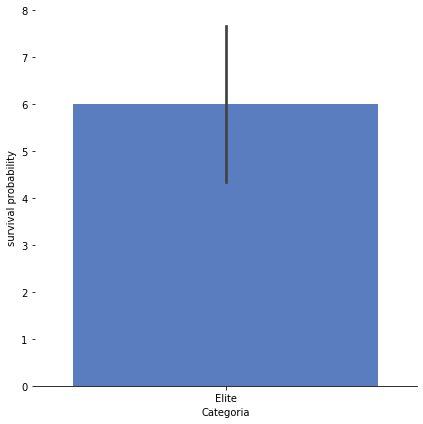

In [12]:
g = sns.catplot(x='Categoria', y='Numero_compentencia', data=data,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")